<a href="https://colab.research.google.com/github/zeon62/TinyML/blob/main/SINE_WAVE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 38 kB/s 
     |████████████████████████████████| 449 kB 5.9 MB/s 
     |████████████████████████████████| 3.8 MB 34.9 MB/s 
     |████████████████████████████████| 50 kB 2.0 MB/s 
     |████████████████████████████████| 152 kB 38.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=58c522e891b45a5d95db55ccf1587df32a3b44c72dc9fa754e8a382e04870932
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.14.1
    Uninstalling google-auth-2.14.1:
      Successfully uninstalled google-auth-2.1

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

**#numpy를 사용해서 임의의 sine파를 생성**

기본적인 모델의 기능 : 임의의 x에 대해 sine x를 예측하는 기능(regression 회귀의 문제)

------
데이터 x를 random으로 생성하는가에 대한 이유? : 
딥러닝 훈련 과정에서 overfitting을 피하기 위해서

단순히 실제 값이 아닌 noise가 섞인 데이터를 제공하는 이유? :
딥러닝을 통해 예측 뿐만이 아닌 패턴성을 찾는 기능을 확인하기 위해서

데이터를 3분할하는 이유?:
데이터셋에 대해 train, validate, test 3가지로 분할하게 되는데 모델 훈련과정에서 모델의 성능에 대한 객관적인 판단을 하기 위한 요소로 활용한다.

*** 결국 데이터를 입력을 위해 전처리하는 과정으로 생각

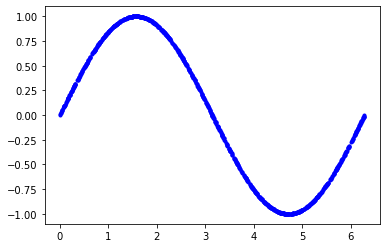

In [ ]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')
plt.show()

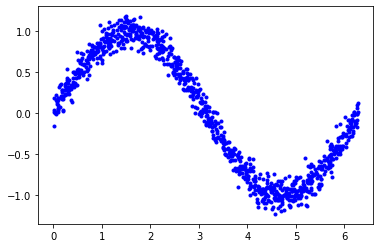

In [ ]:
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

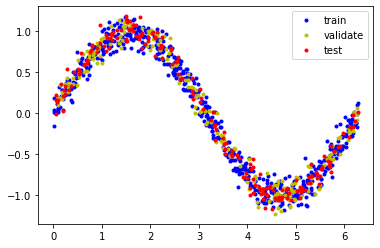

In [ ]:
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="train")
plt.plot(x_validate, y_validate, 'y.', label="validate")
plt.plot(x_test, y_test, 'r.', label="test")
plt.legend()
plt.show()

# **기본모델1** 
레이어1개(16뉴런) 모델 / 활성화함수 : Relu / Optimizer : rmsprop

-----
모델 학습 결과 분석

loss 기준 : 모델이 개선되는 과정 확인 하지만 loss 값 자체가 0.15로 높은 편

mae 기준 : train 결과와 validate 결과에 대비해서 train mae가 전반적으로 낮게 나오면서 과적합을 의심 / mae 값 자체도 0.3의 불안정한 결과 산출 



In [ ]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation = 'relu', input_shape = (1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 1ms/sample - loss: 0.7887 - mae: 0.7848 - val_loss: 0.5824 - val_mae: 0.6867
Epoch 2/1000
600/600 [==============================] - 0s 188us/sample - loss: 0.4883 - mae: 0.6194 - val_loss: 0.4742 - val_mae: 0.6056
Epoch 3/1000
600/600 [==============================] - 0s 187us/sample - loss: 0.4208 - mae: 0.5637 - val_loss: 0.4259 - val_mae: 0.5631
Epoch 4/1000
600/600 [==============================] - 0s 445us/sample - loss: 0.3822 - mae: 0.5367 - val_loss: 0.3861 - val_mae: 0.5356
Epoch 5/1000
600/600 [==============================] - 0s 141us/sample - loss: 0.3472 - mae: 0.5115 - val_loss: 0.3512 - val_mae: 0.5097
Epoch 6/1000
600/600 [==============================] - 0s 141us/sample - loss: 0.3173 - mae: 0.4885 - val_loss: 0.3196 - val_mae: 0.4852
Epoch 7/1000
600/600 [==============================] - 0s 157us/sample - loss: 0.2891 - mae: 0.4684 - val_loss: 0.2935 - val_ma

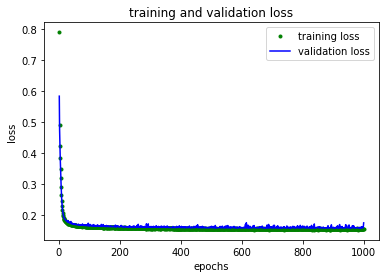

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

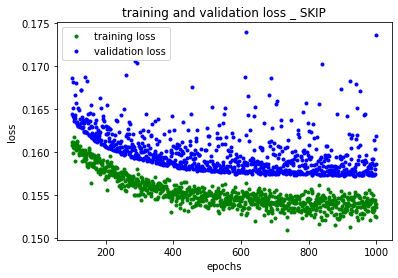

In [ ]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'validation loss')
plt.title('training and validation loss _ SKIP')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


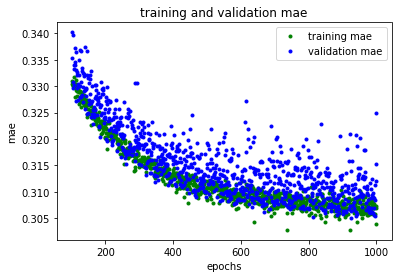

In [ ]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label = 'training mae')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'validation mae')
plt.title('training and validation mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

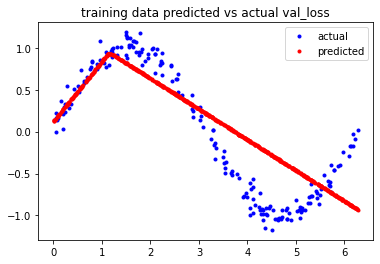

In [ ]:
predictions = model_1.predict(x_train)

plt.clf()
plt.title('training data predicted vs actual val_loss')
plt.plot(x_test, y_test, 'b.', label = 'actual')
plt.plot(x_train, predictions, 'r.', label = 'predicted')
plt.legend()
plt.show()

# **기본모델2** 
레이어2개(16뉴런) 모델 / 활성화함수 : Relu / Optimizer : rmsprop

-----
모델 학습 결과 분석

loss 기준 / mae 기준 : 모델 1과 비교해서 과적합 우려도 적어지고, 실질적인 mae가 감소하여 합리적 모델

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation = 'relu', input_shape = (1,)))
model_2.add(layers.Dense(16, activation = 'relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])
model_2.save("model.h5")
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size = 16, validation_data = (x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 2ms/sample - loss: 0.6993 - mae: 0.7257 - val_loss: 0.4758 - val_mae: 0.6040
Epoch 2/600
600/600 [==============================] - 0s 153us/sample - loss: 0.4000 - mae: 0.5489 - val_loss: 0.3766 - val_mae: 0.5306
Epoch 3/600
600/600 [==============================] - 0s 158us/sample - loss: 0.3225 - mae: 0.4913 - val_loss: 0.3078 - val_mae: 0.4715
Epoch 4/600
600/600 [==============================] - 0s 154us/sample - loss: 0.2664 - mae: 0.4482 - val_loss: 0.2561 - val_mae: 0.4314
Epoch 5/600
600/600 [==============================] - 0s 155us/sample - loss: 0.2206 - mae: 0.4084 - val_loss: 0.2094 - val_mae: 0.3941
Epoch 6/600
600/600 [==============================] - 0s 155us/sample - loss: 0.1883 - mae: 0.3798 - val_loss: 0.1816 - val_mae: 0.3689
Epoch 7/600
600/600 [==============================] - 0s 130us/sample - loss: 0.1666 - mae: 0.3571 - val_loss: 0.1709 - val_mae: 0.35

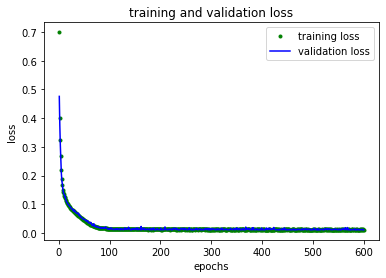

In [ ]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

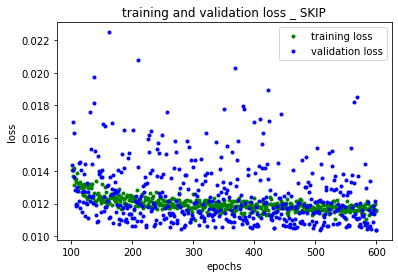

In [ ]:
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'validation loss')
plt.title('training and validation loss _ SKIP')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

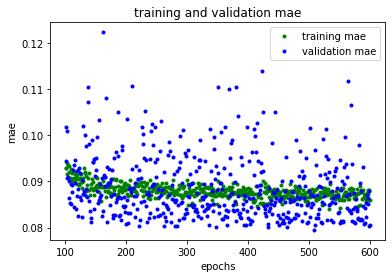

In [ ]:
plt.clf()

mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label = 'training mae')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'validation mae')
plt.title('training and validation mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

모델에 데이터셋 test 적용 - evaluate 진행 및 예측

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

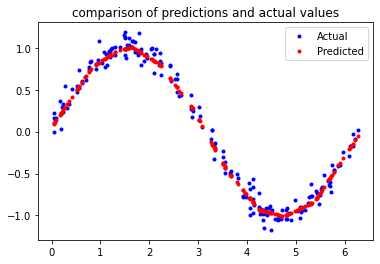

In [ ]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)

plt.clf()
plt.title('comparison of predictions and actual values')
plt.plot(x_test,y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
open("sine_model.tflite", "wb").write(tflite_model)

2736

In [ ]:
#tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)

AttributeError: ignored

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_generator():
    for value in x_test:
      yield[np.array(value, dtype = np.float32, ndmin = 2)]
converter.representative_dataset = representative_dataset_generator
tflite_model = converter.convert()

open("sine_model_quantized.tflite", "wb").write(tflite_model)

2512

In [ ]:
#tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)

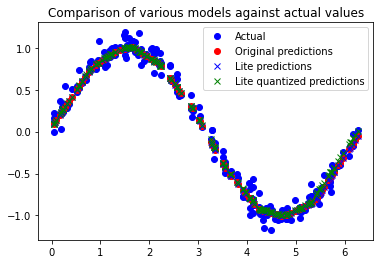

In [ ]:
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

sine_model_predictions = []
sine_model_quantized_predictions = []

for x_value in x_test:
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)

  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)

  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predictions, 'ro', label = 'Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label = 'Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions,'gx', label = 'Lite quantized predictions')
plt.legend()
plt.show()


In [ ]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2736 bytes
Quantized model is 2512 bytes
Difference is 224 bytes


In [ ]:
!apt-get -qq install xxd
!xxd -i sine_model.tflite > sine_model.cc
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc 

unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x60, 0x09, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00, 0x90, 0x02, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74,
  0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x48, 0x02, 0x00, 0x00, 0x34, 0x02, 0x00, 0x00,
  0x0c, 0x02, 0x00, 0x00, 0xfc, 0x00, 0x00, 0x00, 0xac, 0x00, 0x00, 0x00,
  0x8c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x34, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x

In [ ]:
!xxd -c 16 sine_model_quantized.tflite > testq.cc
!xxd -c 16 sine_model.tflite > test.cc
!cat test.cc 

00000000: 1c00 0000 5446 4c33 0000 1200 1c00 0400  ....TFL3........
00000010: 0800 0c00 1000 1400 0000 1800 1200 0000  ................
00000020: 0300 0000 640a 0000 1000 0000 1c00 0000  ....d...........
00000030: 2c00 0000 0c00 0000 0100 0000 ec00 0000  ,...............
00000040: 0100 0000 b400 0000 0f00 0000 544f 434f  ............TOCO
00000050: 2043 6f6e 7665 7274 6564 2e00 0c00 0000   Converted......
00000060: 8800 0000 7c00 0000 6800 0000 5400 0000  ....|...h...T...
00000070: 4800 0000 3c00 0000 3000 0000 2800 0000  H...<...0...(...
00000080: 2000 0000 1800 0000 1000 0000 0400 0000   ...............
00000090: b6ff ffff 5800 0000 a4f6 ffff a8f6 ffff  ....X...........
000000a0: acf6 ffff b0f6 ffff ceff ffff 2802 0000  ............(...
000000b0: d6ff ffff c402 0000 deff ffff 4803 0000  ............H...
000000c0: f6ff ffff e403 0000 0000 0600 0a00 0400  ................
000000d0: 0600 0000 3808 0000 0000 0600 0800 0400  ....8...........
000000e0: 0600 0000 c408 0000 f4f6 ffff 0500 000